<a href="https://colab.research.google.com/github/AarohSinha100/DEEP_LEARNING/blob/main/NATURAL_LANGUAGE_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in Tensorflow

NLP has the goal of deriving information out of natural language (could be text or speech).

Antoher common term for NLP problems is sequence to sequence problems. (seq2seq)

# Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f19ab5a2-bcee-ad7a-4e34-33d6088564bd)


## Get the helper functions
----->https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

#Import series of helper functions for the notebooks
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-06-07 17:42:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-07 17:42:05 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we are going to be using is Kaggle's Introduction to NLP dataset (text samples of tweet labelled as disasters or not disasters)
> So binary classification on diffrent tweets

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip #This is going to download the file from kaggle (nlp getting started)

#Unzip data
unzip_data("nlp_getting_started.zip") #Helper Functions :)

--2023-06-07 17:42:09--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-06-07 17:42:09 (125 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## VISUALIZE...VISUALIZE...VISUALIZE - Visualizing a text dataset

To visuzalize our text data, we have to read them in. We are gonna use Pandas library

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv") #Train data
test_df = pd.read_csv("test.csv") #Test Data

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Checking what 1 and 0 mean

In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

This is a disaster tweet...means that 1 is for disaster and 0 for non disaster.

In [ ]:
# Shuffle the data
train_df_shuffle = train_df.sample(frac=1, random_state=42) #sample shuffle the data (frac 1 means it will shuffle 100% of our data)

In [ ]:
train_df_shuffle.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df.iloc[132].text #This is a non disaster tweet

'Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.'

In [ ]:
#Test data...
test_df.head() #There is no target column here as we have to specify that

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#How many examples of each class do we have
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

If data is unbalanced in any other projects - https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [ ]:
print(f"The total number of tweets in triaining set is {len(train_df)}")
print(f"The total number of tweets in the test set is {len(test_df)}")

The total number of tweets in triaining set is 7613
The total number of tweets in the test set is 3263


#### Let's Visualize some random training samples

In [ ]:
import random
def get_random_tweet(dataset=train_df):
  for i in range(0,5):
    random_index = random.randint(0,len(dataset)+1)
    try:
      random_tweet = dataset.iloc[random_index].text
      random_tweet_class = dataset.iloc[random_index].target
      print("TEXT - ")
      print(random_tweet)
      if random_tweet_class == 0:
        print("----->The tweet is non disastraous")
      else:
        print("----->The tweet is a disaster")
    except:
      print("No such dataset found or index might be our of range")
    
    print(" ")
    print("-----------------------------------------------------------------------------------------------")
    print(" ")

In [ ]:
random_tweet = get_random_tweet(train_df)

TEXT - 
Stony Jackson is America's last hope as he leads an army of felons thus and army rejects against the army o Satan - http://t.co/0wbEcdMHQo
----->The tweet is non disastraous
 
-----------------------------------------------------------------------------------------------
 
TEXT - 
A protest rally at Stone Mountain? Atleast they're not burning down buildings and looting store like some individuals do when they 'protest'
----->The tweet is non disastraous
 
-----------------------------------------------------------------------------------------------
 
TEXT - 
Whirlwind Head Scissor on @alexhammerstone @kttape ktfounder #RemyMarcel #FroFroFroÛ_ https://t.co/B19z8Vi3td
----->The tweet is non disastraous
 
-----------------------------------------------------------------------------------------------
 
TEXT - 
ng2x5 mhtw4fnet

Watch Michael Jordan absolutely destroy this meme-baiting camper - FOXSportscom
----->The tweet is non disastraous
 
--------------------------------------

#### Splitting dataset into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#Use train test split to split training data into training and validaiton sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffle["text"].to_numpy(),
                                                                             train_df_shuffle["target"].to_numpy(),
                                                                             test_size=0.1, #Use 10 percent ot the data
                                                                             random_state=42)
#Train test split accepts numpy

In [ ]:
#Check the lengths
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
#Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

#### This Dats Is Still In Text Form...We'll have to convert it into numerical form before passing into the model for training

## Converting Text Data Into Numbers Using Tokenization And Embeddings

When dealing with text problems, first thing we have to do is to convert text to numbers before building a model.

There are a few ways to do this - 
* Tokenization - direct mapping of token (a token could be a word or a charecter) to a number
* Embedding - creating a matrix of feature vector for each token

#1. Text Vectorization (tokenization)

>Text Vectorizer
The vocabulary for the layer must be either supplied on construction or learned via adapt(). When this layer is adapted, it will analyze the dataset, determine the frequency of individual string values, and create a vocabulary from them. This vocabulary can have unlimited size or be capped, depending on the configuration options for this layer; if there are more unique values in the input than the maximum vocabulary size, the most frequent terms will be used to create the vocabulary.

The processing of each example contains the following steps:

* Standardize each example (usually lowercasing + punctuation stripping)
* Split each example into substrings (usually words)
* Recombine substrings into tokens (usually ngrams) --N-grams are contiguous sequences of n items (characters, words, or other units) extracted from a given text--
* Index tokens (associate a unique int value with each token)
* Transform each example using this index, either into a vector of ints or a dense float vector.

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

We have to map these text data into some numerical representation

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

>* max_tokens = None ---> #Define how many diffrent words can be there in the vocabulary (The vocabulary can be very big, so let this class only figure how may words are gonna be there adds <00V>)
>* standardize="lower_and_strp_punctuations" ---> We wanna remove unwanted punctuation and also all words must be like same lowercase...so this is the normalization in texts (just like rescaling 1/255. in images)
>* split="whitespace" ---> It is gonna split the worrds in whitespaces
>* ngrams=None --->Create groups of n words, giving it None means leaving it on its own to specify
>*  output_mode=int ---> How to map tokens into numbers
>* output_sequence_lengt ---> Just like batches (how long)....we can limit the sequence lengths using this

DEFAULT EXAMPLE  ----

In [ ]:
#Use default text vectorizer parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
#Fint the average number of tokens (words) in training tweets ---> WE ARE GONNA SET THE MAX LENGTH TO AVERAGE LENGTH OF TOKEN TWEETS SO AS TO KEEP OUR DATA SMALL
round(sum([len(i.split()) for i in train_sentences]))/len(train_sentences)

14.901036345059115

In [ ]:
#Setup text vectorization variables
max_vocab_length = 10000 #Max number of words to have in our vocabulary
max_length = 15 #Max length our sequences will need (e.g - how many words from a tweet our model sees)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer into training data

text_vectorizer.adapt(train_sentences) #adapting the vectorizer to the training data

In [ ]:
#Create a sample sentence and tokenize it
sample_sentence = "There is a flood in my street"
text_vectorizer([sample_sentence]) #It wants a list

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Since the max length was 15, the shape is also (1,15)

>This sequence is 6 words long, after it we have zeros padded 

In [ ]:
# Chose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"The original text is:\n{random_sentence}\
      \n\n Vectorized version:")
text_vectorizer([random_sentence])

The original text is:
@burberryant bleeding on the brain don't know the cause      

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,  587,   11,    2, 1890,   63,  106,    2,  257,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Inspecting the number of unique words in our vocabulary the vectorizer has fgot in the train data
words_in_vocab = text_vectorizer.get_vocabulary() #Get all of the unique words in the training data
top_5_words = words_in_vocab[:5] #Most common words the vectorizer found
bottom_5_words = words_in_vocab[-5:] #Least occuring words

print(f"The number of words in vocab : {len(words_in_vocab)}")

print(f"The 5 most common words: {top_5_words}")
print(f"The 5 least common words: {bottom_5_words}")

The number of words in vocab : 10000
The 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
The 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


#2.EMBEDDING

>Creating an Embedding Layer - Turns positive integers (indexes) into dense vectors of fixed size.
--- e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

To make our embedding layer, we are going to use the Tensorflow embedding Layer - https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The Parameters we care most about our embedding layers are - 
* `input_dim` - This is the size of our vocabulary
* `output_dim` - size of the output embedding layer...for example a value of 100 means each token gets represented by a vector 100 long
* `input_length` - length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"The original text :\ {random_sentence}\
\n\n Embedded Version - ")
#Embed random sentence (turn into dendse vectors of a fixed size)
#We need to turn it first in the vectorizer as embedding turns positive "INTEGER" to vectors
#Right now it is just words....let's create them into int
sample_embed = embedding(text_vectorizer([random_sentence]))

sample_embed

The original text :\ Cell Phone Shop : http://t.co/iOq051t5te #629 8-Pin Lightning Connector 2.1A Car Charger For Apple 5 5S 5C 6 6+ iÛ_ http://t.co/klxAUcNP5I

 Embedded Version - 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04134491, -0.00159863,  0.01980717, ..., -0.01299115,
          0.0208254 ,  0.0223966 ],
        [ 0.04732246,  0.02330602,  0.01713059, ..., -0.00070627,
         -0.0137905 ,  0.01193313],
        [-0.01710637, -0.02210553,  0.04437119, ...,  0.03841979,
         -0.04540541,  0.03306251],
        ...,
        [-0.00472503,  0.02831844,  0.00463182, ...,  0.02907172,
          0.016291  , -0.03763517],
        [-0.0477449 ,  0.00169557, -0.01968043, ..., -0.0308611 ,
         -0.03043112,  0.03798098],
        [-0.04275444,  0.01556275,  0.04594073, ..., -0.03424549,
          0.04486721, -0.02724433]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0], random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04134491, -0.00159863,  0.01980717,  0.00624888, -0.04232964,
         0.0364141 , -0.02397284,  0.02803009,  0.03450369,  0.01417526,
         0.03585858,  0.0310072 , -0.03001758,  0.0453001 , -0.00524889,
         0.043879  , -0.02537545,  0.04853258,  0.03155625, -0.02957367,
        -0.01504999, -0.00284743,  0.04324925, -0.01922392,  0.03336864,
        -0.00439656, -0.04556565, -0.03103905, -0.00157691, -0.01409397,
        -0.02171482,  0.0088232 ,  0.0337415 ,  0.02348901, -0.04449555,
         0.03573899,  0.0064647 , -0.02717172, -0.02008392, -0.0072505 ,
        -0.03425287, -0.00225637,  0.03921964, -0.01866356,  0.01740218,
         0.03202671, -0.04500021, -0.02912926, -0.01140256,  0.03807548,
        -0.01365334,  0.01280094, -0.0001724 ,  0.0213665 , -0.00145358,
         0.02268598, -0.04026543, -0.01695202, -0.00162592, -0.02174668,
        -0.01850837,  0.04003472,  0.01672799,  0.04641683,  0.0463728 ,
  

## Modelling a text dataset and Running a series of experiments

Now we got a way to turn out text sequences into numbers, let's start modelling with a series of experiments

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-Forward Neural Network (dense model)
* Model 2: LSTM Model (RNN)
* Model 3: GRU Model (RNN)
* Model 4: Bidirectional-LSTM Model (RNN)
* Model 5: 1D Convolutional Neural Netowrk (CNN)
* Model 6: Transfer Learning Model
* Model 7: Same as Model 6 with 10% of training data



# MODEL 0: BASELINE MODEL (NAIVE BAYES CLASSIFIER) - 79.27%

To create our baseline, we will use multinomial naive bayes model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Create tokenization and modelling pipeline

model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),#convert words to numbers (name, function)
    ("clf",MultinomialNB()) #model the text
])

#Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of 79.27%


In [ ]:
#Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
#Get baseline results
baseline_results = calculate_results(val_labels, baseline_preds)

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# MODEL 1: FEED FORWARD NEURAL NETWORK MODEL (DENSE MODEL)

In [ ]:
# Create a Tensorboard Callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save tendorboard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and it predicts multile results form 1 sentence)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230607-174214
Epoch 1/5
215/215 [==============================] - 20s 70ms/step - loss: 0.6124 - accuracy: 0.6911 - val_loss: 0.5375 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4419 - accuracy: 0.8168 - val_loss: 0.4671 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3473 - accuracy: 0.8612 - val_loss: 0.4561 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2850 - accuracy: 0.8889 - val_loss: 0.4667 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2385 - accuracy: 0.9123 - val_loss: 0.4772 - val_accuracy: 0.7835


THE MODEL IS NOT IMPROVING MUCH

Looks like our baseline is outperforming our model_1

## Visualizing learned embeddings

In [ ]:
#Get the vocabulary from the text vectorization
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

These are the odest common words

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of the embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0] #if layer not found, check the model summary and the name of the embedding layer
embed_weights

array([[-0.03431485,  0.06492641,  0.01804921, ..., -0.0056389 ,
        -0.03644315,  0.01503701],
       [-0.02758117,  0.04756122, -0.00203538, ..., -0.01978559,
        -0.03826602,  0.043572  ],
       [-0.01813884,  0.01713146, -0.00213831, ..., -0.01177805,
        -0.05879504, -0.00293622],
       ...,
       [-0.04855562, -0.02351548,  0.02598368, ...,  0.01663053,
        -0.00732379,  0.02907452],
       [ 0.00419331,  0.03924385,  0.03547308, ...,  0.08242538,
        -0.0572527 ,  0.05284252],
       [-0.04716341,  0.09481687,  0.06677979, ...,  0.10053758,
        -0.04731078,  0.08862591]], dtype=float32)

In [ ]:
print(embed_weights.shape) #same size as vocab size and embedding_dim (output_dim of our embeding layer)

(10000, 128)


Every token is embedded into a 128 dimension vector

#### Now we have got the embeding matrix pur model has learned to represent tokens, let's see how we can visualize it

To do so Tensorflow has a handy tool called `Projector` and also tensorflow has an incredible guide for word embeddings

In [ ]:
# Create embedding files (we got this from tensorflow word embeding documentation)
import io
out_v = io.open('vectors.tsv','w',encoding='utf-8')
out_m = io.open('metadata.tsv','w',encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index==0:
    continue #skip 0, it's padding
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + '\n')
  out_m.write(word+"\n")

out_v.close()
out_m.close()

In [ ]:
# Download files from colab t upload to projector (again from docs)
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except:
#   pass

## Recurrent Neural Networks (RNN's)

RNN's are useful for the sequence data.

The premise of a recurrent neural networks is to use the representation of a previous input to aid the representation of a later input

# MODEL 2: LSTM (RNN MODEL)

LSTM = Long Short Term Memory... this is one of the modst popular LSTM cells

Our structure in RNN looks like this - 

```
Input (text) -> Tokenize -> Embedding -> Layers (RNN/Dense) ->Output (label probability)
```

In [ ]:
#Create a lstm MODEL
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape) #shape of output layer from embedding
x = layers.LSTM(64, return_sequences=True)(x) #When stacking RNN sequences together we need to return sequences
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
x = layers.Dense(64, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)


In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_lstm")])

Saving TensorBoard log files to: model_logs/model_2_lstm/20230607-174245
Epoch 1/5
215/215 [==============================] - 19s 64ms/step - loss: 0.2225 - accuracy: 0.9238 - val_loss: 0.5458 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1602 - accuracy: 0.9416 - val_loss: 0.6554 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1331 - accuracy: 0.9486 - val_loss: 0.7409 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1065 - accuracy: 0.9606 - val_loss: 0.7822 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0885 - accuracy: 0.9653 - val_loss: 1.0057 - val_accuracy: 0.7625


In [ ]:
#Make Prediction with LSTM Model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[8.53715464e-03],
       [5.70760131e-01],
       [9.99943614e-01],
       [7.54001886e-02],
       [1.10835754e-04],
       [9.99093175e-01],
       [8.15781951e-01],
       [9.99969482e-01],
       [9.99940395e-01],
       [7.67824471e-01]], dtype=float32)

In [ ]:
#Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#Calculate model 2 results
model_2_results = calculate_results(val_labels, model_2_preds)

In [ ]:
model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.7626600366229389,
 'recall': 0.7624671916010499,
 'f1': 0.7611077640788777}

# MODEL 3: GRU POWERED RNN

Another Popoular and effective RNN component is the GRU or gated recurrent unit

The Gru cell has similiar feature to a LSTM cells but has less parameters

In [ ]:
#Build an RNN using a GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)  #If u want to stack recurrent layer on top of each other, u coud put return sequences to True
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                       

In [ ]:
# Compile The Model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences, val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                    "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230607-174316
Epoch 1/5
215/215 [==============================] - 19s 60ms/step - loss: 0.1386 - accuracy: 0.9517 - val_loss: 1.1127 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0744 - accuracy: 0.9691 - val_loss: 1.2159 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0670 - accuracy: 0.9698 - val_loss: 1.4386 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0544 - accuracy: 0.9752 - val_loss: 1.5030 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0495 - accuracy: 0.9758 - val_loss: 1.3448 - val_accuracy: 0.7664


In [ ]:
# Make some preidctions with our GRU Model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[4.3558364e-04],
       [6.6129124e-01],
       [9.9998736e-01],
       [2.6404136e-01],
       [4.0404713e-05],
       [9.9982989e-01],
       [7.8701669e-01],
       [9.9998665e-01],
       [9.9998498e-01],
       [8.3072782e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs)) #to remove that one dimension
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#Calculate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)

In [ ]:
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 0.7690247510270006,
 'recall': 0.7664041994750657,
 'f1': 0.7637309688758864}

# MODEL 4: BIDIRECTIONAL RNN

Normal RNN goes from left to right, just like we read english sentence.... however a bidirectional RNN goes from right to left from left to right

In [ ]:
# Build a bidirectional RNN in Tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
print(x.shape)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
print(x.shape)
x = layers.Bidirectional(layers.GRU(64))(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

(None, 15)
(None, 15, 128)
(None, 15, 128)
(None, 128)


In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [ ]:
# Comple the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
#Fit the model
history_model_4 = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                      "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230607-174405
Epoch 1/5
215/215 [==============================] - 20s 61ms/step - loss: 0.1051 - accuracy: 0.9679 - val_loss: 0.9474 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0558 - accuracy: 0.9749 - val_loss: 1.2516 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0497 - accuracy: 0.9737 - val_loss: 1.2624 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0449 - accuracy: 0.9781 - val_loss: 1.3980 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0408 - accuracy: 0.9794 - val_loss: 1.4847 - val_accuracy: 0.7585


In [ ]:
# Make predictions with our bidirectional Model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 7ms/step


array([[2.4600038e-03],
       [6.7174566e-01],
       [9.9986947e-01],
       [1.9296925e-01],
       [2.8697863e-05],
       [9.9982905e-01],
       [9.9424970e-01],
       [9.9994957e-01],
       [9.9991775e-01],
       [9.9530715e-01]], dtype=float32)

In [ ]:
#Convert predprobs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [ ]:
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(val_labels,
                                    model_4_preds)

In [ ]:
model_4_results

{'accuracy': 75.8530183727034,
 'precision': 0.7593999956661763,
 'recall': 0.7585301837270341,
 'f1': 0.7566051475454213}

# MODEL 5: CONVOLUTIONAL NEURAL NETWORKS FOR TEXTA ND OTHER SEQUENCES

Typical structure of a Conv1D model for sequences (in our case text - )
```
Inputs (text) -> Tokenization -> Embedding -> Layers (typically conv1d + pooling) - > outputs
```

EXAMPLE


In [ ]:
# Test our embedding Layer , Conv1D layer and maxpooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is text sequence"])) #turn target sequence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        activation="relu",
                        padding="valid")

#Check what our output is
conv_1d_output = conv_1d(embedding_test) #passing embedding_Test through our conv 1d layer
#Setup a maxpool layer -> as we are using a conv layer, we need to use a maxpool layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) #passing the conv1d output in the maxpool layer ("get the feature with the hightst values")

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

embedding = [1,15,128] -> as we have 1 sequence that is padded into a 15 length sequence as a 128 dimension feature vector
conv1d = [1,11,32] -> as we have used valid padding and kernelsize of 5, our shape becomes 11 (we would have got 15 at padding=same),32 is filters
maxpool - > takes everythiong and combines a s1 seqeuence of 32

In [ ]:
# conv_1d_output

In [ ]:
# max_pool_output

In [ ]:
# Cerate 1D Convolutional Layer to mdel sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)

x = layers.Conv1D(filters=64,
                  kernel_size=5, #look at 5 words at a time
                  activation="relu",
                  strides=1,
                  padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
#x = layers.Dense(64, activation="relu")
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="Model_5_Conv2D")

#Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
moel_5_history = model_5.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences, val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                    "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230607-174457
Epoch 1/5
215/215 [==============================] - 13s 52ms/step - loss: 0.1250 - accuracy: 0.9574 - val_loss: 0.8896 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0779 - accuracy: 0.9717 - val_loss: 1.0410 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0608 - accuracy: 0.9764 - val_loss: 1.1103 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0544 - accuracy: 0.9794 - val_loss: 1.2069 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0526 - accuracy: 0.9768 - val_loss: 1.2466 - val_accuracy: 0.7520


In [ ]:
# Make some predictions with our Conv1d model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[9.7066775e-02],
       [9.8264998e-01],
       [9.9995899e-01],
       [1.5569457e-02],
       [8.2206320e-08],
       [9.9690610e-01],
       [9.5555007e-01],
       [9.9995184e-01],
       [9.9999928e-01],
       [8.6901510e-01]], dtype=float32)

In [ ]:
#COnvert model_5_pred_probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)

model_5_results

{'accuracy': 75.19685039370079,
 'precision': 0.7529888699847289,
 'recall': 0.7519685039370079,
 'f1': 0.7497885511234939}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# MODEL 6: TENSORFLOW HUB PRETRAINED FEATURE EXTRACTOR
Now we have built a few of our own model,let's try and use transfer learning for NLP, specifically for tensorflow

MODEL LINK -> https://tfhub.dev/google/collections/universal-sentence-encoder/1

In [ ]:
sample_sentence

'There is a flood in my street'

This gets turned into numerical representation below

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers"])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01602836  0.01068853  0.02425464 -0.0140577   0.01434427  0.08292626
  0.0196337   0.06160139 -0.00352701 -0.01216416  0.00978647 -0.01248499
  0.01232347  0.09748451  0.06141113 -0.03728352  0.01860887 -0.04669852
  0.00413913 -0.06363907 -0.02469897  0.02713692  0.02284444 -0.0021003
 -0.00630592 -0.03964961  0.02220408  0.00115074 -0.03132182  0.00119528
 -0.0401255   0.04561896 -0.01530598 -0.00175914  0.02173134 -0.08450425
  0.03340027  0.04604555 -0.02480251 -0.08681663  0.00702696 -0.00770477
 -0.01434536  0.07814163 -0.10676058 -0.05152996 -0.00858158 -0.03232232
 -0.03871096  0.02581472], shape=(50,), dtype=float32)


In [ ]:
embed_samples.shape

TensorShape([2, 512])

In [ ]:
# Creaqte Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create Model using  Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu",name="output_layer_1"),
    layers.Dense(1, activation="sigmoid")
],name="model_6_USE")

In [ ]:
#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 output_layer_1 (Dense)      (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230607-174604
Epoch 1/5
215/215 [==============================] - 7s 14ms/step - loss: 0.5006 - accuracy: 0.7866 - val_loss: 0.4496 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4149 - accuracy: 0.8123 - val_loss: 0.4368 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3999 - accuracy: 0.8219 - val_loss: 0.4335 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3923 - accuracy: 0.8254 - val_loss: 0.4294 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3849 - accuracy: 0.8297 - val_loss: 0.4270 - val_accuracy: 0.8136


In [ ]:
# Create Predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = calculate_results(val_labels,
                                    model_6_preds)
model_6_results

24/24 [==============================] - 1s 9ms/step


{'accuracy': 81.36482939632546,
 'precision': 0.8147394195152357,
 'recall': 0.8136482939632546,
 'f1': 0.8125379768469353}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

FINALLY WE BEAT OUR BASELINE MODEL AFTER SO MANY EXPERIMENTS.....IN THE END THAT IS ONLY THE MACHINE LEARNING PRACTITIONER'S MOTTO...EXPERIMENT EXPERIMENT AND EXPERIMENT!!

In [ ]:
len(train_df)

7613

# MODEL 7: TF HUB PRETRAINED USE BUT WITH 10% OF PRETRAINED MODEL

In [ ]:
# Create subsets of 10% of the training data
train_10_percent = train_df_shuffle[["text","target"]].sample(frac=0.1, random_state=42)

In [ ]:
train_sentences_10_percent = train_10_percent["text"].to_list()

In [ ]:
len(train_10_percent)

761

In [ ]:
train_labels_10_percent = train_10_percent["target"].to_list()

In [ ]:
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [ ]:
# Check number of targets in our subset of data
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
train_df_shuffle["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recerate a model same as a previous model u created u can use the tf.keras.models.clone_model() method

In [ ]:
# Let's Build a model same as model 6
model_7 = tf.keras.models.clone_model(model_6)

#Compile model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Summary
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 output_layer_1 (Dense)      (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_7 = model_7.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               "model_7")])

Saving TensorBoard log files to: model_logs/model_7/20230607-175119
Epoch 1/5
215/215 [==============================] - 3s 14ms/step - loss: 0.5030 - accuracy: 0.7815 - val_loss: 0.4533 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4157 - accuracy: 0.8159 - val_loss: 0.4456 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4018 - accuracy: 0.8205 - val_loss: 0.4367 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3926 - accuracy: 0.8289 - val_loss: 0.4388 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3871 - accuracy: 0.8305 - val_loss: 0.4255 - val_accuracy: 0.8189


In [ ]:
#Pred probs
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

24/24 [==============================] - 1s 15ms/step


In [ ]:
#Calculate results
model_7_results = calculate_results(val_labels, model_7_preds)

In [ ]:
model_7_results

{'accuracy': 81.88976377952756,
 'precision': 0.8196605460013572,
 'recall': 0.8188976377952756,
 'f1': 0.817984880977007}

In [ ]:
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8147394195152357,
 'recall': 0.8136482939632546,
 'f1': 0.8125379768469353}

This model performs better than our model trained on full data. But this is model is outperforming......WHYYYY?

This might be because - 
>* We have created the sets on shuffled data for model 6 (train test split)
>* Model 7 sets were created directly from train_df_shuffled
>* We have data leakage problem.....
>* Two diffrent random sets are created....some of validation data is inside the 10_percent_data....so offcourse its prediction is going to be same

## Fixing the 10 percent split

taking 10 percent of train test splits now...not from train df shuffles....so both val and train datas are completely diffrent

In [ ]:
# Making a better dataset split
train_sentences_10_percent_split = int((0.1)*len(train_sentences))
train_sentences_10_percent_split = train_sentences[:train_sentences_10_percent_split] #685
train_sentences_10_percent_split[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
train_labels_10_percent_split = int((0.1)*len(train_labels))
train_labels_10_percent_split = train_labels[:train_labels_10_percent_split]

In [ ]:
import pandas as pd
pd.Series(np.array(train_labels_10_percent_split)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
history_7_updated = model_7.fit(train_sentences_10_percent_split,
                        train_labels_10_percent_split,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               "model_7")])

Saving TensorBoard log files to: model_logs/model_7/20230607-180730
Epoch 1/5
22/22 [==============================] - 1s 25ms/step - loss: 0.3866 - accuracy: 0.8307 - val_loss: 0.4308 - val_accuracy: 0.8110
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.3660 - accuracy: 0.8453 - val_loss: 0.4331 - val_accuracy: 0.8136
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.3449 - accuracy: 0.8599 - val_loss: 0.4375 - val_accuracy: 0.8058
Epoch 4/5
22/22 [==============================] - 1s 26ms/step - loss: 0.3289 - accuracy: 0.8672 - val_loss: 0.4420 - val_accuracy: 0.8058
Epoch 5/5
22/22 [==============================] - 1s 24ms/step - loss: 0.3160 - accuracy: 0.8730 - val_loss: 0.4485 - val_accuracy: 0.8005


## Comparing the performance of each of our models

In [ ]:
## Making a pd dataset kind of things from result combinations
all_model_results=pd.DataFrame({"0_baseline":baseline_results,
                               "2_lstm":model_2_results,
                               "3_GRU":model_3_results,
                               "4_Bidirectional":model_4_results,
                               "5_Conv1D":model_5_results,
                               "6_tfhub_use":model_6_results})
all_model_results = all_model_results.transpose()

In [ ]:
# Resuce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

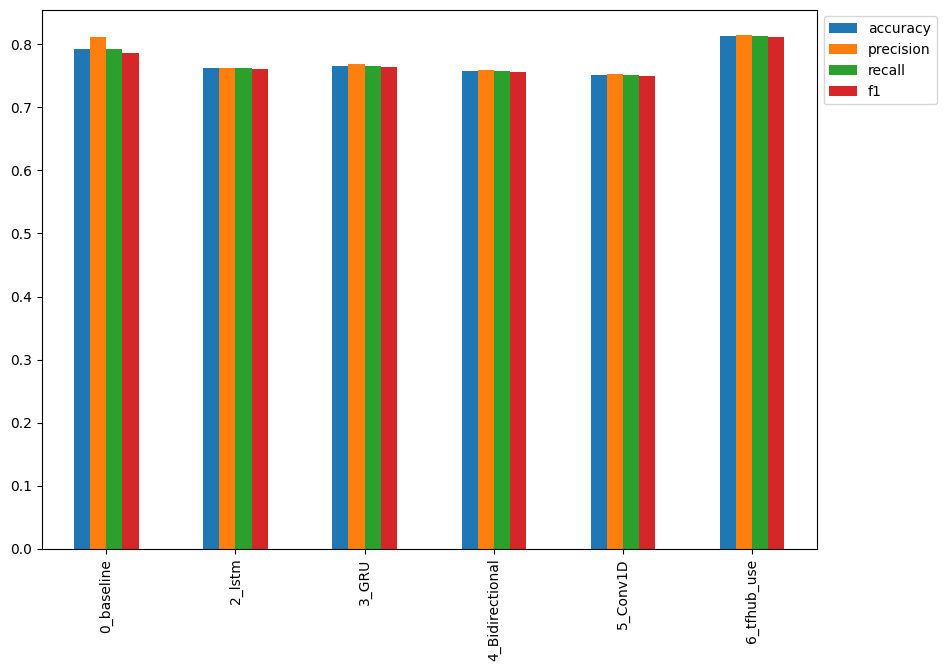

In [ ]:
#Plot and compare all of the model results
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))
#To put legend outside

<Axes: >

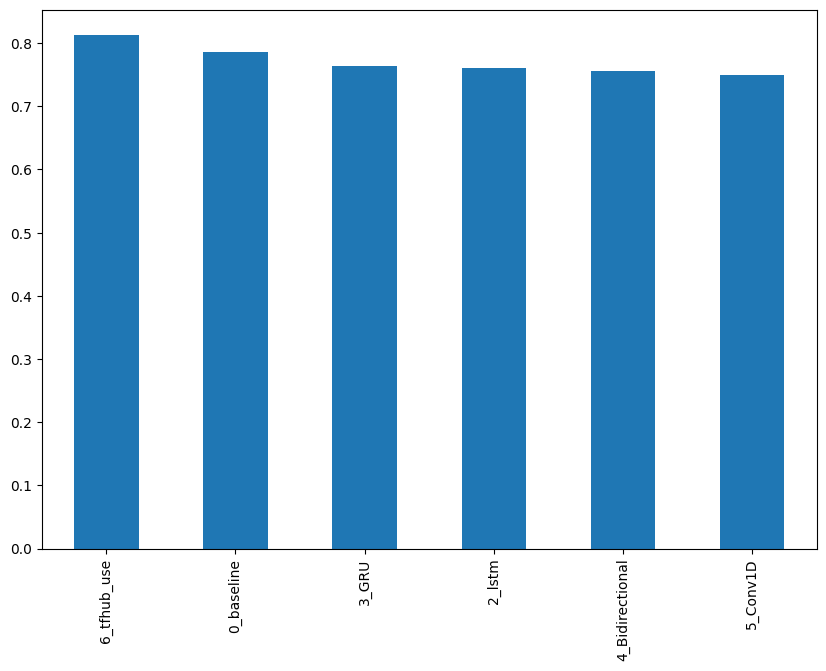

In [ ]:
# Sort model results by f1 score
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

# Uploading our model training logs to Tensorboard.dev

In [ ]:
# View etnsorboard logs of transfer leanrning modelling experiments (plus all of our other models)
# Upload Tensorboard dev records
# !tensorboard dev upload --logdir ./model_logs/ \
#   --name "NLP Modelling Experiments ZTM Course video codealong" \
#   --one_shot #Exit the uploader once uploading is finished

## Saving and loading the trained model

There are 2 main formats to save a model in TensorFlow:
1. HDF5
2. The `SavedModel` format

In [ ]:
model_6_results #The best model

{'accuracy': 81.36482939632546,
 'precision': 0.8147394195152357,
 'recall': 0.8136482939632546,
 'f1': 0.8125379768469353}

In [ ]:
#Save this model
model_6.save("model_6.h5")

In [ ]:
import tensorflow_hub as hub

In [ ]:
# Load that back in (as object as it was from tensorflow hub)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
# How does loaded model performs
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.4270 - accuracy: 0.8136


[0.4270358681678772, 0.8136482834815979]

## Finding the most wrong examples

* If our model is not the perfect, what examples are it getting wrong
* and of these wrong examples which one is it getting *most* wrong (those will prediction probabilities closest to the opposite class)

For example if our sample should be 0 but it is predicted 0.99999 (close to 1) and vice-versa

In [ ]:
# Download a pretrained model fomr mrdbourke github
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-06-07 18:47:58--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  50.7MB/s    in 17s     

2023-06-07 18:48:14 (55.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.i

In [ ]:
#Import previously trained model from github
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
#Make predictions with loaded model
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 14ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create a DataFrame from the validation sentences and best performing model predictions
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "preds":model_6_pretrained_preds,
                       "pred_probs":tf.squeeze(model_6_pretrained_pred_probs)})

val_df.head()

,text,target,preds,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
#Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["preds"]].sort_values("pred_probs",ascending=False)
most_wrong[:10]

,text,target,preds,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


These are false positives

## making predictions on the test dataset


In [ ]:
# Making predictions on tehst dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_sentences[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [ ]:
test_samples = random.sample(test_sentences, 10) #Gives 10 samples
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) #our model expects list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")


1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.04014390707015991
Text:
?Maybe someday we'll find the place where our dreams and reality collide.?

-----

1/1 [==============================] - 0s 38ms/step
Pred: 1, Prob: 0.8161736726760864
Text:
Sooooo shooting up movie theaters the new mass murderer wave??

-----

1/1 [==============================] - 0s 42ms/step
Pred: 1, Prob: 0.7939366698265076
Text:
Going to attempt the California fair again tomorrow hopefully we don't die in a tornado ??

-----

1/1 [==============================] - 0s 35ms/step
Pred: 0, Prob: 0.054553426802158356
Text:
@simplyysacred dude like he screams his soul out

-----

1/1 [==============================] - 0s 39ms/step
Pred: 0, Prob: 0.18610574305057526
Text:
Bayelsa poll: Plans by Patience Jonathan to hijack APC tickens http://t.co/eyn0E8pmJq

-----

1/1 [==============================] - 0s 44ms/step
Pred: 1, Prob: 0.9632819294929504
Text:
International News Û¢åÊ'Nigeria suicide

In [ ]:
pred_prob = tf.squeeze(model_6_pretrained.predict(["mass murder happens'?" ])) #our model expects list as input
pred = tf.round(pred_prob)
int(pred)

1/1 [==============================] - 0s 57ms/step


1